In [95]:
import numpy as np
import pandas as pd                                                         # for data wrangling and analysis
import mglearn

import sklearn as sk                                                        # for machine learning
from sklearn.model_selection import train_test_split                        # split data into 75% training & 25% test sets by default
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from mlxtend.plotting import plot_decision_regions                          # for decision boundary

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colormaps
# list(colormaps)

*<ins>Goals</ins>: To build a machine learning model that can learn from the measurements of these irises whose species is known, so that we can predict the species for a new iris.*

In [140]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Keys of iris_dataset: {}".format(iris.keys()))   

Keys of iris_dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [141]:
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df = iris_df.assign(y_label = iris['target'])
iris_df['species'] = iris_df['y_label'].map({0:'setosa', 1:'versicolor', 2:'virginica'})
display(iris_df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_label,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [152]:
# Get features and labels into NumPy array

X_iris = iris_df.iloc[:,0:4].values
# X_iris = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values 
y_iris = iris_df['y_label']

# Shuffle dataset and Create Training and Test Subsets

indices = np.arange(y_iris.shape[0])
rnd = np.random.RandomState(32)
shuffled_indices = rnd.permutation(indices)

X_iris_shuffled, y_iris_shuffled = X_iris[shuffled_indices], y_iris[shuffled_indices]
X__iris_train, y_iris_train = X_iris_shuffled[:100], y_iris_shuffled[:100]
X_iris_test, y_iris_test = X_iris_shuffled[100:], y_iris_shuffled[100:]

# In Scikit-learn

X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=123, shuffle=True)
y_iris_train = y_iris_train.to_numpy()
y_iris_test = y_iris_test.to_numpy()

**EDA:**

* The three classes seem to be relatively well separated using the sepal and petal measurements.

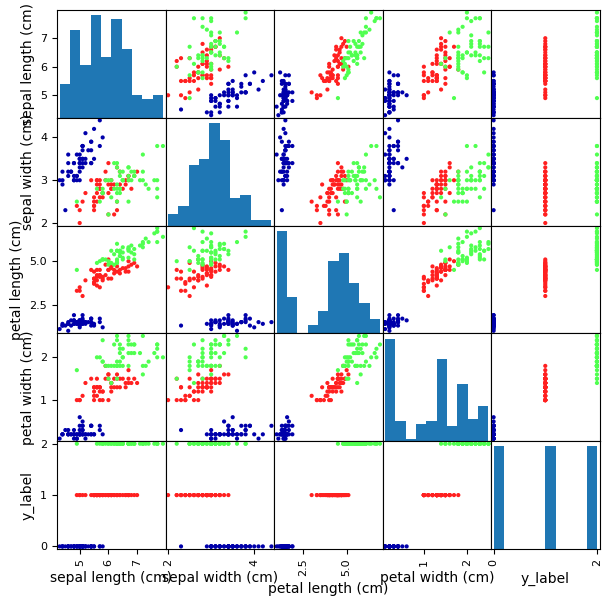

In [153]:
grr = pd.plotting.scatter_matrix(iris_df, 
                                 alpha = 1,                # amount of transparency
                                 figsize = (7, 7),
                                 marker = '.',
                                 c = iris_df['y_label'],   # color by types of iris species
                                 cmap = mglearn.cm3)       # colormap

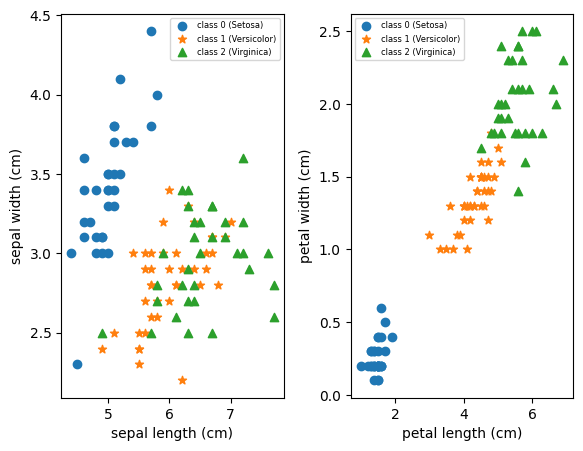

In [188]:
plt.subplot(1, 2, 1)
plt.scatter(X_iris_train[y_iris_train==0][:, 0], X_iris_train[y_iris_train==0][:, 1],  marker='o', label='class 0 (Setosa)')
plt.scatter(X_iris_train[y_iris_train==1][:, 0], X_iris_train[y_iris_train==1][:, 1],  marker='*', label='class 1 (Versicolor)')
plt.scatter(X_iris_train[y_iris_train==2][:, 0], X_iris_train[y_iris_train==2][:, 1],  marker='^', label='class 2 (Virginica)')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend(loc='upper right', fontsize = 6)

# plt.scatter(X_iris_train[y_iris_train == 0, 0], X_iris_train[y_iris_train == 0, 1], marker='o', label='class 0 (Setosa)')
# plt.scatter(X_iris_train[y_iris_train == 1, 0], X_iris_train[y_iris_train == 1, 1], marker='^', label='class 1 (Versicolor)')
# plt.scatter(X_iris_train[y_iris_train == 2, 0], X_iris_train[y_iris_train == 2, 1], marker='s', label='class 2 (Virginica)')

plt.subplot(1, 2, 2)
plt.scatter(X_iris_train[y_iris_train==0][:, 2], X_iris_train[y_iris_train==0][:, 3],  marker='o', label='class 0 (Setosa)')
plt.scatter(X_iris_train[y_iris_train==1][:, 2], X_iris_train[y_iris_train==1][:, 3],  marker='*', label='class 1 (Versicolor)')
plt.scatter(X_iris_train[y_iris_train==2][:, 2], X_iris_train[y_iris_train==2][:, 3],  marker='^', label='class 2 (Virginica)')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper left', fontsize = 6)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

**Fitting k-nearest neighbor (knn) model:**

For this model, the test set accuracy is about 0.96, which means we made the right prediction for 96% of the irises in the test set. Under some mathematical assumptions, we can expect our model to be correct 96% of the time for new irises.

In [192]:
iris_knn_model = KNeighborsClassifier(n_neighbors=3)
iris_knn_model.fit(X_iris_train, y_iris_train)

# Making predictions on the test set

y_iris_pred = iris_knn_model.predict(X_iris_test) 

print("Test set score (the fraction that species were correctly predicted): {:.2f}".format(np.mean(y_iris_pred == y_iris_test))) 
print("Test set score (the score method of knn): {:.2f}".format(iris_knn_model.score(X_iris_test, y_iris_test))) # return the mean accuracy

iris_test_pred = pd.DataFrame(X_iris_test, columns=iris['feature_names'])
iris_test_pred = iris_test_pred.assign(y_test = y_iris_test,
                                       y_pred = y_iris_pred)
display(iris_test_pred)

Test set score (the fraction that species were correctly predicted): 0.96
Test set score (the score method of knn): 0.96


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_test,y_pred
0,6.3,2.5,4.9,1.5,1,2
1,6.8,3.0,5.5,2.1,2,2
2,6.4,2.8,5.6,2.2,2,2
3,5.6,3.0,4.1,1.3,1,1
4,4.9,3.6,1.4,0.1,0,0
5,6.0,3.0,4.8,1.8,2,2
6,6.3,2.3,4.4,1.3,1,1
7,4.4,3.2,1.3,0.2,0,0
8,4.4,2.9,1.4,0.2,0,0
9,5.5,2.6,4.4,1.2,1,1


**Visualizing decision boundary:**

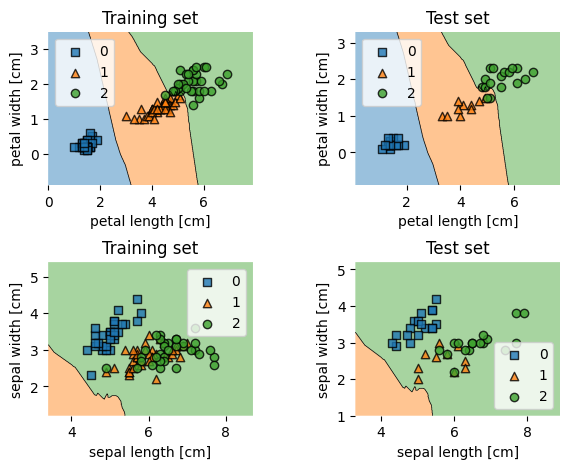

In [193]:
iris_knn_model_petal = KNeighborsClassifier(n_neighbors=3)
iris_knn_model_petal.fit(X_iris_train[:, 2:4], y_iris_train)

iris_knn_model_sepal = KNeighborsClassifier(n_neighbors=3)
iris_knn_model_sepal.fit(X_iris_train[:, 0:2], y_iris_train)

plt.subplot(2, 2, 1)
plot_decision_regions(X_iris_train[:, 2:4], y_iris_train, iris_knn_model_petal)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.title('Training set')
plt.legend(loc='upper left')

plt.subplot(2, 2, 2)
plot_decision_regions(X_iris_test[:, 2:4], y_iris_test, iris_knn_model_petal)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.title('Test set')

plt.subplot(2, 2, 3)
plot_decision_regions(X_iris_train[:, 0:2], y_iris_train, iris_knn_model_petal)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.title('Training set')
plt.legend(loc='upper right')

plt.subplot(2, 2, 4)
plot_decision_regions(X_iris_test[:, 0:2], y_iris_test, iris_knn_model_petal)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='lower right')
plt.title('Test set')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.5)
plt.show()